<a href="https://colab.research.google.com/github/Edgarmejiav/sentiment-analysis-whatsApp/blob/main/whatsapp_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17413 sha256=bc303e2bff9ec74f100eb4e4afb788cfe53e7be4d4c03c4087a31dbc2e66fd71
  Stored in directory: /root/.cache/pip/wheels/60/b3/27/d8aff3e2d5c2d0d97a117cdf0d5f13cd121e2c2b5fb49b55a0
Successfully built googletrans

In [ ]:

def validar_formato_fecha(texto):
    regex = r"^\d{1,2}/\d{1,2}/\d{2}$"
    return bool(re.match(regex, texto))

def separar_fecha_texto(texto):
  try:
      fecha = texto.split(",")[0]
      texto = texto.split("Edgarmejiav:")[1]
      return fecha + ":" +texto 
  except ValueError:
    print("Error: el formato del texto no es válido")
    return None

from googletrans import Translator

def traducir_es_a_en(texto_es):
    translator = Translator()
    texto_en = translator.translate(texto_es, src='es', dest='en').text
    return texto_en

def grafico_sentimientos(sentiments):
  try:
    # Crear dos listas, una para las polaridades positivas (felices) y otra para las negativas (tristes)
    polaridades_positivas = [sentiment.polarity for sentiment in sentiments if sentiment.polarity > 0]
    polaridades_negativas = [sentiment.polarity for sentiment in sentiments if sentiment.polarity < 0]

    # Crear un gráfico de barras para comparar la cantidad de frases felices y tristes
    fig, ax = plt.subplots()
    ax.bar(['Felices', 'Tristes'], [len(polaridades_positivas), len(polaridades_negativas)])
    ax.set_ylabel('Número de Frases')
    ax.set_title('Comparación de Sentimientos')
    plt.show()

  except Exception as e:
    print("Error en el gráfico:", e)

import matplotlib.pyplot as plt

def grafico_sentimientos_torta(sentiments):
    try:
        # Crear dos listas, una para las polaridades positivas (felices) y otra para las negativas (tristes)
        polaridades_positivas = [sentiment.polarity for sentiment in sentiments if sentiment.polarity > 0]
        polaridades_negativas = [sentiment.polarity for sentiment in sentiments if sentiment.polarity < 0]

        # Crear un gráfico de torta para comparar la cantidad de frases felices y tristes
        labels = ['happy', 'sad']
        sizes = [len(polaridades_positivas), len(polaridades_negativas)]
        colors = ['#99ff99', '#ff9999']
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Feelings Comparison (Lega)')
        plt.show()

    except Exception as e:
        print("Error en el gráfico:", e)



In [ ]:

# Abre el archivo original en modo de lectura
with open("/content/WhatsApp_Chat.txt", "r") as f_original:

  # Abre un nuevo archivo en modo de escritura
  with open('archivo_nuevo_Edgar.txt', 'w') as f_nuevo:

    # Recorre cada línea del archivo original
    for linea in f_original:

      # Verifica si la línea incluye ": <Media omitted>"
      if (": <Media omitted>" not in linea and
                "https" not in linea and
                "Herrera Mendoza" not in linea and
                "null" not in linea):
        if "lega:" in linea:

         f_nuevo.write(separar_fecha_texto(linea))

# Cierra ambos archivos
f_original.close()
f_nuevo.close()



In [1]:
archivo = open("/content/archivo_nuevo_Edgar.txt", "r")
phrasesTxt = archivo.readlines()

# Cierra el archivo
archivo.close()

# Imprime la lista de líneas del archivo
print(phrasesTxt)


FileNotFoundError: ignored

In [2]:
class SentimentData:
    def __init__(self, polarity, subjectivity, date):
        self.polarity = polarity
        self.subjectivity = subjectivity
        self.date = date

sentimentsArray = []
for phrase in tqdm(phrasesTxt):
    p =phrase.split(":")
    phraseText=p[1]
    phraseDate= p[0]
    
    try:
        tb = TextBlob(traducir_es_a_en(phraseText))
       # tb = TextBlob(phraseText)
        sentiment = tb.sentiment
        polarity = sentiment.polarity
        subjectivity = sentiment.subjectivity
        if polarity != 0.0 and subjectivity != 0.0:
            #print(sentiment)
            sentimentsArray.append(SentimentData(polarity,subjectivity,phraseDate))
    except:
        continue

print(sentimentsArray)


NameError: ignored

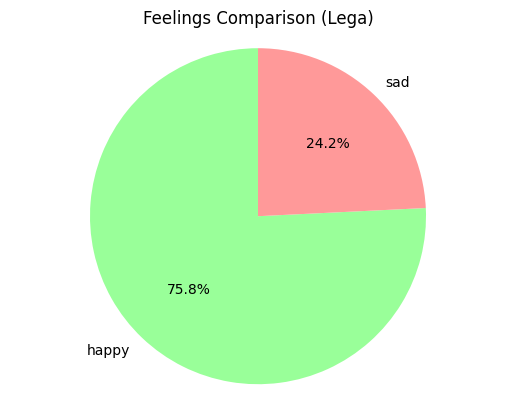

In [ ]:
grafico_sentimientos_torta(sentimentsArray)

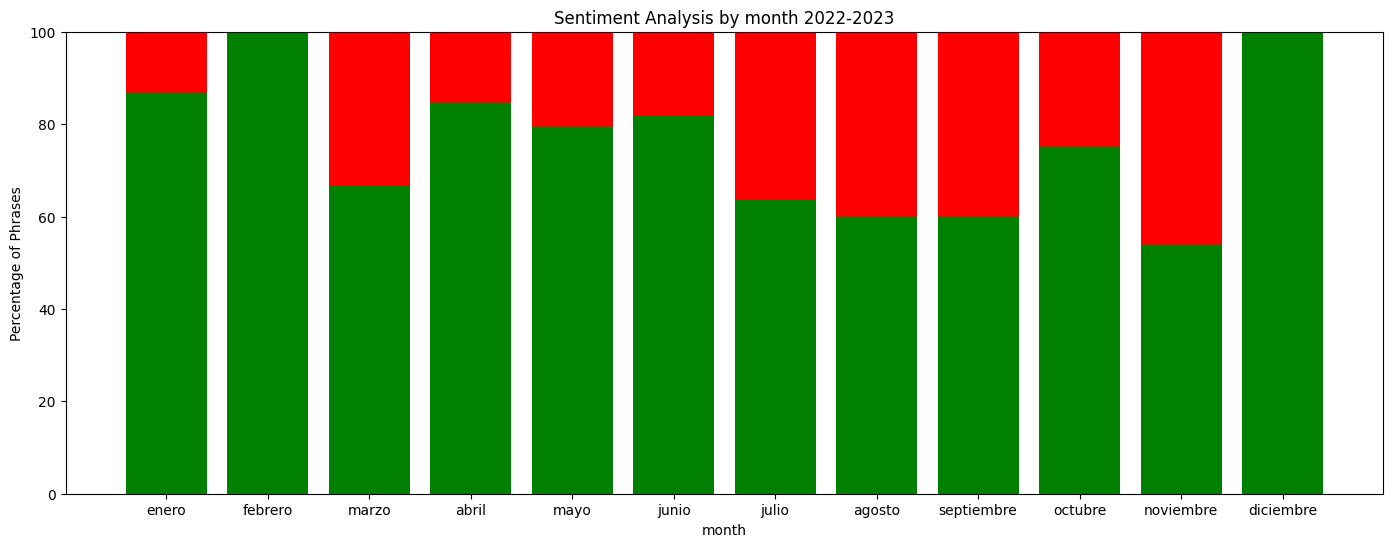

In [ ]:
# Create a bar chart of happy vs sad days in a month
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
from datetime import datetime

happy_months = [0] * 12
sad_months = [0] * 12

for sentiment in sentimentsArray:
    fecha_dt = datetime.strptime(sentiment.date, "%m/%d/%y")
    month = fecha_dt.month - 1
    if sentiment.polarity >= 0:
        happy_months[month] += 1
    else:
        sad_months[month] += 1
        
total_months = [happy_months[i] + sad_months[i] for i in range(12)]
happy_perc = [happy_months[i]/total_months[i]*100 if total_months[i]!=0 else 0 for i in range(12)]
sad_perc = [sad_months[i]/total_months[i]*100 if total_months[i]!=0 else 0 for i in range(12)]

ancho = len(meses) + 5
alto = 6
plt.figure(figsize=(ancho, alto))

x_pos = [i for i, _ in enumerate(meses)]
plt.bar(x_pos, happy_perc, color='green')
plt.bar(x_pos, sad_perc, color='red', bottom=happy_perc)
plt.xlabel("month")
plt.ylabel("Percentage of Phrases")
plt.title("Sentiment Analysis by month 2022-2023")
plt.xticks(x_pos, meses)
plt.show()
